In [77]:
import numpy as np

#from assets.keras.keras.datasets import shapes_3d
from assets.keras.keras.preprocessing.image import ImageDataGenerator
from assets.keras.keras.models import Sequential
from assets.keras.keras.layers.core import Dense, Dropout, Activation, Flatten
from assets.keras.keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D
from assets.keras.keras.layers.normalization import BatchNormalization
from assets.keras.keras.optimizers import SGD, RMSprop, Adam
from assets.keras.keras.utils import np_utils, generic_utils
from assets.keras.keras.regularizers import l2
from assets.keras.keras.callbacks import EarlyStopping, ModelCheckpoint
from assets.validation import *
from assets.vis_utils import *
import theano
import matplotlib.pyplot as plt
from matplotlib.pyplot import imsave
import math
from assets.vis_utils import *
from matplotlib import cm

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

#load dataset from gen_dataset
import cPickle as pickle

from assets.saveloadmodel import loadmodel
modelid = 300
thismodel = loadmodel(modelid)

fpath = os.getcwd() + "/figures/classinversion/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
model, input_img = empty_model(stop_at='FULL')

In [51]:
model.layers[-1].output_shape

(None, 8)

In [76]:
out = class_inversion(thismodel)

Running class inversion


<IPython.core.display.Javascript object>


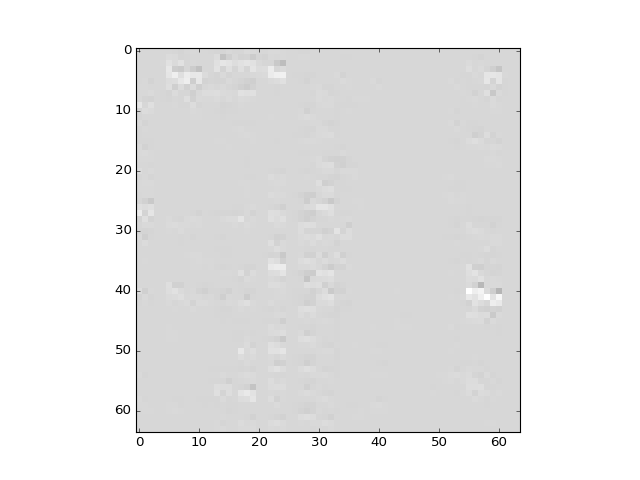

In [85]:
visualize_matrix(out[7,:,:,:],interval_len=100,ubound=255)
#visualize_grid(np.expand_dims(out[0],axis=1),ubound=255)

In [75]:
thismodel.predict_proba(np.expand_dims(np.expand_dims(out[1,:,:,:],axis=0),axis=0))

1/1 [==============================] - 0s


array([[  0.00000000e+00,   1.00000000e+00,   5.60519386e-45,
          0.00000000e+00,   2.84166779e-31,   0.00000000e+00,
          5.03893335e-39,   0.00000000e+00]])

In [87]:
for c in range(8):
    for t in range(16): # we have to split out a png for each element of the feature gif
        imsave(fpath + "class_%i_%02i.png" % (c,t), out[c,t,:,:],vmin=0,vmax=255,cmap=cm.gray)